In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'OneDrive/Documents/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'OneDrive/Documents/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[ 36.25  29.    28.  ]
   [ 70.25  62.25  60.25]
   [ 68.25  60.25  58.25]
   ...
   [ 75.75  70.75  67.75]
   [ 72.25  67.25  64.25]
   [ 73.5   68.5   65.5 ]]

  [[ 37.    29.25  28.25]
   [ 68.75  60.75  58.75]
   [ 66.75  58.75  56.75]
   ...
   [ 76.    71.    68.  ]
   [ 73.25  68.25  65.25]
   [ 73.25  68.25  65.25]]

  [[ 36.75  29.75  28.75]
   [ 76.25  68.25  66.25]
   [ 73.25  65.25  63.25]
   ...
   [ 77.    72.    69.  ]
   [ 73.75  68.75  65.75]
   [ 74.75  69.75  66.75]]

  ...

  [[ 63.5   56.5   55.5 ]
   [128.75 120.75 118.75]
   [120.5  112.5  110.5 ]
   ...
   [200.5  195.5  192.5 ]
   [209.   204.   201.  ]
   [196.75 191.75 188.75]]

  [[ 63.    55.    53.  ]
   [124.25 116.25 114.25]
   [119.   111.   109.  ]
   ...
   [200.75 195.75 192.75]
   [201.75 196.75 193.75]
   [188.25 183.25 180.25]]

  [[ 59.75  52.25  51.25]
   [130.   122.   120.  ]
   [127.   119.   117.  ]
   ...
   [203.   198.   195.  ]
   [190.25 185.25 182.25]
   [203.5  198.5  19

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [16]:
model = Sequential()

In [17]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=32, kernel_size=3,padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [18]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=32, kernel_size=3,padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [19]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [20]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [21]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [22]:
model.add(Dropout(0.25))

In [23]:
model.add(Flatten())

In [24]:
model.add(Dense(units=1500,activation='relu'))

In [25]:
model.add(Dropout(0.4))

In [26]:
model.add(Dense(units=38,activation='softmax'))

In [27]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_17 (Conv2D)          (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 64, 64, 32)        9248      
                                                                 
 conv2d_19 (Conv2D)          (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                 

In [29]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10


2197/2197 [==============================] - 1066s 471ms/step - loss: 1.8987 - accuracy: 0.4538 - val_loss: 0.9251 - val_accuracy: 0.7258
Epoch 2/10
2197/2197 [==============================] - 1101s 501ms/step - loss: 0.9301 - accuracy: 0.7128 - val_loss: 0.5838 - val_accuracy: 0.8215
Epoch 3/10
2197/2197 [==============================] - 1189s 541ms/step - loss: 0.6643 - accuracy: 0.7909 - val_loss: 0.4285 - val_accuracy: 0.8676
Epoch 4/10
2197/2197 [==============================] - 1223s 556ms/step - loss: 0.5202 - accuracy: 0.8349 - val_loss: 0.3426 - val_accuracy: 0.8921
Epoch 5/10
2197/2197 [==============================] - 946s 430ms/step - loss: 0.4331 - accuracy: 0.8592 - val_loss: 0.3100 - val_accuracy: 0.9025
Epoch 6/10
2197/2197 [==============================] - 871s 396ms/step - loss: 0.3675 - accuracy: 0.8795 - val_loss: 0.2758 - val_accuracy: 0.9104
Epoch 7/10
2197/2197 [==============================] - 901s 410ms/step - loss: 0.3211 - accuracy: 0.8947 

In [30]:
train_loss, train_acc = model.evaluate(training_set)


2197/2197 [==============================] - 274s 125ms/step - loss: 0.1052 - accuracy: 0.9671


In [31]:
print(train_loss, train_acc)

0.10524652898311615 0.9671242833137512


In [32]:
val_loss, val_acc = model.evaluate(validation_set)

550/550 [==============================] - 66s 120ms/step - loss: 0.1888 - accuracy: 0.9386


In [33]:
print(val_loss,val_acc)

0.1887987107038498 0.9385954737663269


In [34]:
model.save("tarinedF_model.keras")

In [35]:
training_history.history

{'loss': [1.8987435102462769,
  0.9300682544708252,
  0.6642515063285828,
  0.5201600193977356,
  0.43311017751693726,
  0.36753594875335693,
  0.3210659325122833,
  0.2817170321941376,
  0.25935274362564087,
  0.22638259828090668],
 'accuracy': [0.45384451746940613,
  0.712753415107727,
  0.7909239530563354,
  0.8349100351333618,
  0.8591507077217102,
  0.8794651031494141,
  0.8946724534034729,
  0.9064087271690369,
  0.9137349724769592,
  0.9239633083343506],
 'val_loss': [0.9251279234886169,
  0.5838215947151184,
  0.4285410940647125,
  0.34262266755104065,
  0.309999942779541,
  0.27584731578826904,
  0.2219424843788147,
  0.22484783828258514,
  0.20491443574428558,
  0.18879878520965576],
 'val_accuracy': [0.7258138060569763,
  0.8214773535728455,
  0.8676303029060364,
  0.8921010494232178,
  0.9025153517723083,
  0.9103687405586243,
  0.9295470118522644,
  0.9263601303100586,
  0.9329046010971069,
  0.9385954737663269]}

In [36]:
import json
with open("trainingF_hist.json","w") as f:
    json.dump(training_history.history,f)

In [37]:
training_history.history['val_accuracy']

[0.7258138060569763,
 0.8214773535728455,
 0.8676303029060364,
 0.8921010494232178,
 0.9025153517723083,
 0.9103687405586243,
 0.9295470118522644,
 0.9263601303100586,
 0.9329046010971069,
 0.9385954737663269]

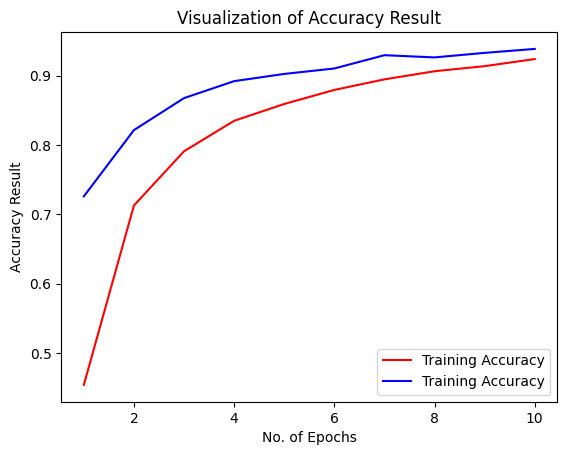

In [38]:
epochs = [i for i in range(1,11)]
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Training Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [39]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [59]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'OneDrive/Documents/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [60]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

550/550 [==============================] - 52s 93ms/step


(array([[9.73042488e-01, 1.80298835e-02, 2.46206150e-06, ...,
         7.43956730e-10, 1.37098374e-10, 3.36457617e-07],
        [9.99987125e-01, 5.25496534e-06, 3.23395444e-09, ...,
         9.40574455e-14, 4.86759591e-11, 7.87095302e-12],
        [9.97266769e-01, 2.71219807e-03, 1.45036125e-08, ...,
         7.47386128e-15, 2.35722710e-13, 3.35935613e-09],
        ...,
        [1.66197569e-05, 3.94551698e-08, 4.29326101e-05, ...,
         2.84702139e-07, 1.74213596e-07, 9.28648055e-01],
        [3.59922356e-04, 8.34212486e-08, 1.22753627e-05, ...,
         1.37613696e-07, 2.57554256e-10, 9.99337733e-01],
        [5.86803089e-12, 3.40218169e-14, 5.79232029e-14, ...,
         4.51243801e-15, 4.19835312e-11, 9.99463856e-01]], dtype=float32),
 (17572, 38))

In [61]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [62]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [63]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [64]:
from sklearn.metrics import classification_report

In [65]:
import numpy as np

# Assuming Y_true and predicted_categories are numpy arrays or can be converted to numpy arrays
unique_classes_true = np.unique(Y_true)
unique_classes_pred = np.unique(predicted_categories)

print("Unique classes in Y_true:", unique_classes_true)
print("Unique classes in predicted_categories:", unique_classes_pred)


Unique classes in Y_true: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Unique classes in predicted_categories: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37]


In [66]:
print(classification_report(Y_true, predicted_categories, target_names=class_name, zero_division=1))


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.94      0.92      0.93       504
                                 Apple___Black_rot       0.92      0.99      0.95       497
                          Apple___Cedar_apple_rust       0.96      0.97      0.97       440
                                   Apple___healthy       0.96      0.93      0.94       502
                               Blueberry___healthy       0.97      0.94      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.97      0.98       421
                 Cherry_(including_sour)___healthy       0.94      0.99      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.91      0.85      0.88       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.86      0.96      0.

In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_true, predicted_categories)
cm

array([[463,  19,   0, ...,   0,   0,   0],
       [  0, 490,   0, ...,   0,   0,   0],
       [  0,   0, 428, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 467,   0,   0],
       [  0,   0,   0, ...,   0, 430,   0],
       [  0,   0,   4, ...,   0,   0, 465]], dtype=int64)

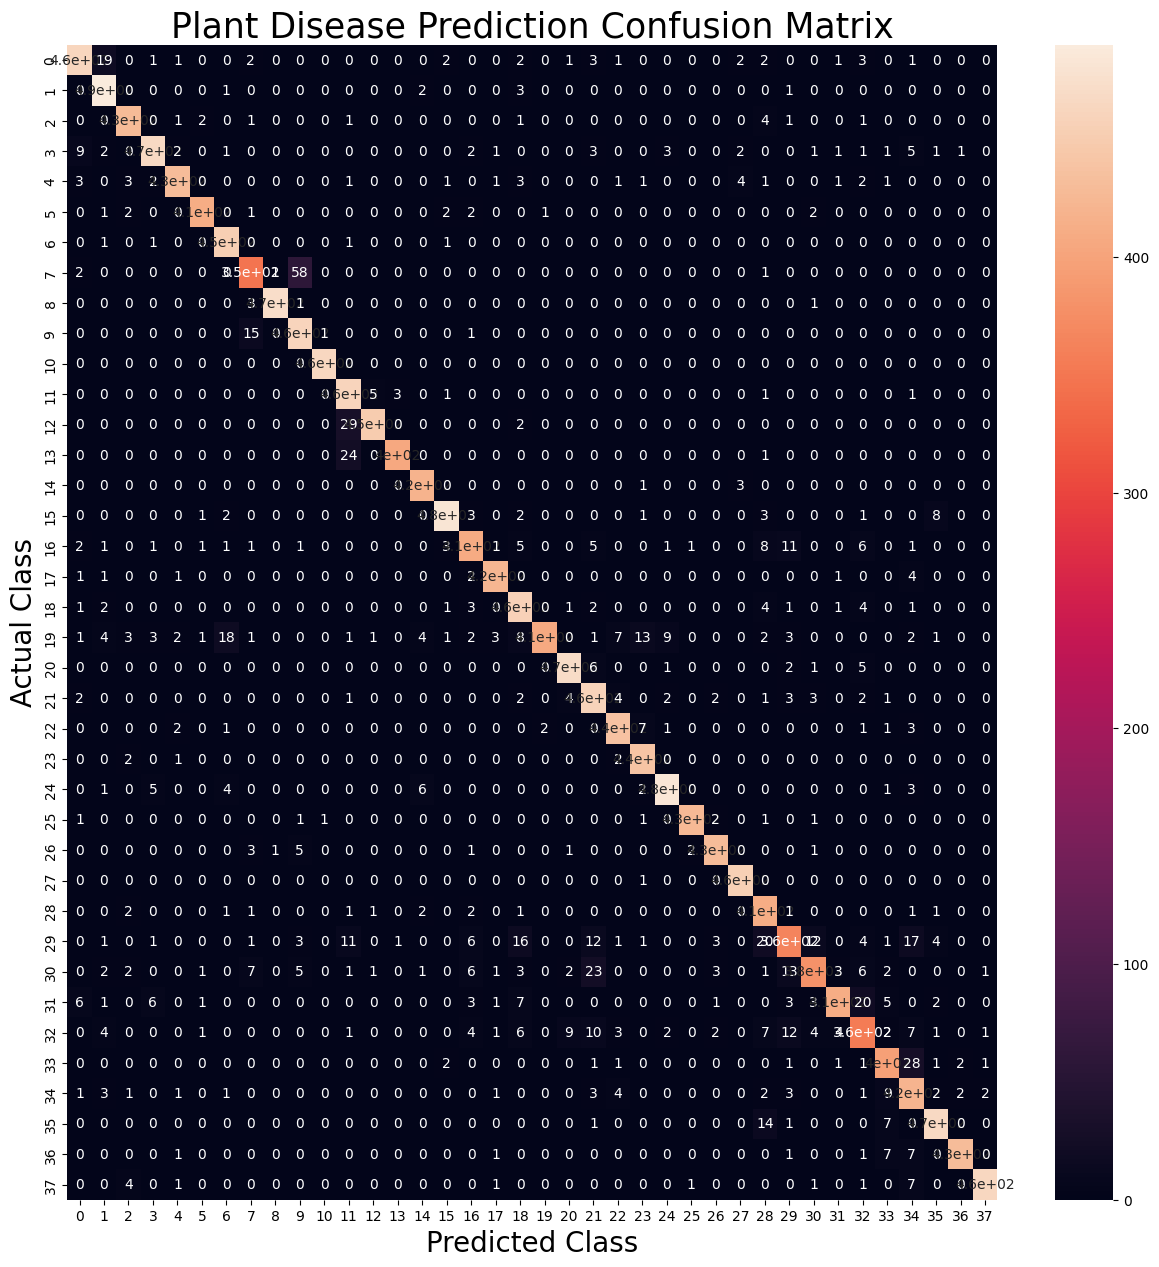

In [68]:
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, annot_kws={'size':10})
plt.xlabel("Predicted Class", fontsize=20)
plt.ylabel("Actual Class", fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix", fontsize=25)
plt.show()